In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import cm
import tqdm
from sklearn import preprocessing, mixture
from hmmlearn import hmm

In [7]:
NASDAQ = yf.Ticker("GOOG")

In [8]:
hist = NASDAQ.history(period='max')
hist['Daily Return'] = np.log(hist['Close'] / hist['Close'].shift(1))
hist = hist.loc['1999-01-01':]
hist.reset_index(inplace = True)
# hist = hist.set_index('Date')
# print(hist.head())
print(hist.tail())

           Date         Open         High          Low        Close   Volume  \
4296 2021-09-13  2864.020020  2883.820068  2845.649902  2869.300049  1008800   
4297 2021-09-14  2883.219971  2894.550049  2858.110107  2868.120117   945800   
4298 2021-09-15  2875.179932  2911.629883  2845.120117  2904.120117  1032400   
4299 2021-09-16  2902.419922  2904.000000  2868.326904  2887.469971  1014600   
4300 2021-09-17  2875.969971  2884.989990  2821.229980  2829.270020  2929500   

      Dividends  Stock Splits  Daily Return  
4296          0           0.0      0.010821  
4297          0           0.0     -0.000411  
4298          0           0.0      0.012474  
4299          0           0.0     -0.005750  
4300          0           0.0     -0.020362  


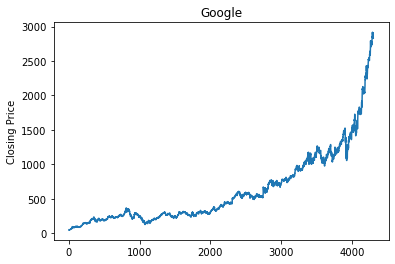

In [9]:
plt.title('Google')
# plt.xticks(ticks = hist['Date'])
plt.ylabel('Closing Price')
close = plt.plot(hist['Close'])

In [10]:
num_ID = 30000
features = []
for i in tqdm.tqdm(range(num_ID)):
    window = np.random.randint(20,40)
    start_ind = np.random.randint(0, len(hist) - window)
    watch = hist.iloc[start_ind : start_ind + window]
    end_date = max(watch['Date'])
    
    # Types of feature, each with chaining of length equals to window size
    volume_change = watch['Volume'].pct_change()
    exc_high = (watch['High'] - watch['Open']) / watch['Open']
    exc_low = (watch['Open'] - watch['Low']) / watch['Low']
    daily_change = (watch['Close'] - watch['Open']) / watch['Open']
    forcast = (watch['Open'].shift(-1) - watch['Open'])
    logret_w1 = np.log(watch['Close']/watch['Close'].shift(1))
    close = watch['Close']
    features.append(pd.DataFrame({'ID': [i] * window,
                                  'Window Size': [window] * window,
                                  'End Date': [end_date] * window,
                                  'Volume Change': volume_change,
                                  'Excessive High': exc_high,
                                  'Excessive Low': exc_low,
                                  'Daily Change': daily_change,
                                  'Daily Return': logret_w1,
                                  'Forcasted Change': forcast,
                                  'Close': close}))
featured = pd.concat(features)

100%|██████████| 30000/30000 [02:58<00:00, 167.71it/s]


In [12]:

def norm(data):
    data = preprocessing.scale(data)
    return data

In [19]:
X = pd.DataFrame()
X['Close'] = norm(compact['Close'].values)
X['Daily Change'] = norm(compact['Daily Change'].values)
X['Volume Change'] = norm(compact['Volume Change'].values)
X['Excessive High'] = norm(compact['Excessive High'].values)
X['Excessive Low'] = norm(compact['Excessive Low'].values)
X['Forcasted Change'] = norm(compact['Forcasted Change'].values)
X['Daily Return'] = norm(compact['Daily Return'].values)
X.index = compact.index
X = X.reset_index()
features = ['Close', 'Daily Change', 'Volume Change', 'Excessive High', 'Excessive Low', 'Forcasted Change', 'Daily Return' ]

ValueError: could not convert string to float: 'Close'

In [17]:
print(X)

Empty DataFrame
Columns: []
Index: []
